**Put any package imports you need in the below space**

In [179]:
%matplotlib inline
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt

### Exercise 1
Generating the adjacency matrix A for graphs of particular type. Write a script that generates the adjacency matrix A for each of the following graphs and prints this matrix onto the screen:
1. K5: 5-clique, or a fully connected simple, undirected graph of 5 nodes
2. K5.3: two disconnected components, C1 and C2, where C1 is a 5-clique K5 and C2 is a 3-clique K3
3. K5.3e: Almost the same as K53 but there is a single edge connecting the two components
4. B2.3: Complete bi-partite graph with n1=2 nodes in the first part and n2=3 nodes in the second part
5. S5: A 5-vertex star (one central "hub" node that connects to all the other "spoke" nodes)
6. P5: A simple path of 5 vertices


In [180]:
# K5: 5-clique, or a fully connected simple, undirected graph of 5 nodes
g1 = nx.complete_graph(5)

# K5.3: two disconnected components, C1 and C2, where C1 is a 5-clique K5 and C2 is a 3-clique K3
g2 = nx.disjoint_union(nx.complete_graph(5), nx.complete_graph(3))

# 3. K5.3e: Almost the same as K53 but there is a single edge connecting the two components
g3 = nx.disjoint_union(nx.complete_graph(5), nx.complete_graph(3))
g3.add_edge(4, 5)

# 4. B2.3: Complete bi-partite graph with n1=2 nodes in the first part and n2=3 nodes in the second part
g4 = nx.complete_bipartite_graph(2, 3)

# 5. S5: A 5-vertex star (one central "hub" node that connects to all the other "spoke" nodes)
g5 = nx.star_graph(5)

# 6. P5: A simple path of 5 vertices
g6 = nx.path_graph(5)

graphs = [g1, g2, g3, g4, g5, g6]
for G in graphs:
    print nx.adj_matrix(G).toarray(); print

[[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]

[[0 1 1 1 1 0 0 0]
 [1 0 1 1 1 0 0 0]
 [1 1 0 1 1 0 0 0]
 [1 1 1 0 1 0 0 0]
 [1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 1 0]]

[[0 1 1 1 1 0 0 0]
 [1 0 1 1 1 0 0 0]
 [1 1 0 1 1 0 0 0]
 [1 1 1 0 1 0 0 0]
 [1 1 1 1 0 1 0 0]
 [0 0 0 0 1 0 1 1]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 1 0]]

[[0 0 1 1 1]
 [0 0 1 1 1]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]]

[[0 1 1 1 1 1]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]]

[[0 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [0 0 0 1 0]]



### Exercise 2
Generating the degree matrix D for a given adjacency matrix A. Write a script that generates a degree matrix for each of the adjacency matrices in Exercise 1. Note that the degree matrix is a diagonal matrix where all the positions except for the diagonal are zero's. The diagonal elements correspond to the degrees of the corresponding nodes, namely Dii = degree(v_i).

In [181]:
def degree_matrix(G):
    return np.diag(nx.degree(G).values())

for G in graphs:
    print degree_matrix(G); print

[[4 0 0 0 0]
 [0 4 0 0 0]
 [0 0 4 0 0]
 [0 0 0 4 0]
 [0 0 0 0 4]]

[[4 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 2]]

[[4 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 0 5 0 0 0]
 [0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 2]]

[[3 0 0 0 0]
 [0 3 0 0 0]
 [0 0 2 0 0]
 [0 0 0 2 0]
 [0 0 0 0 2]]

[[5 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 2 0 0]
 [0 0 0 2 0]
 [0 0 0 0 1]]



### Exercise 3
Generating the graph Laplacian matrix L for a given adjacency matrix A and its degree matrix D. Write a script that generates the graph Laplacian matrix L = D - A for each of the adjacency matrices in Exercise 1.

In [182]:
def laplacian_matrix(G):
    return nx.laplacian_matrix(G)

for G in graphs:
    print laplacian_matrix(G).toarray(); print

[[ 4 -1 -1 -1 -1]
 [-1  4 -1 -1 -1]
 [-1 -1  4 -1 -1]
 [-1 -1 -1  4 -1]
 [-1 -1 -1 -1  4]]

[[ 4 -1 -1 -1 -1  0  0  0]
 [-1  4 -1 -1 -1  0  0  0]
 [-1 -1  4 -1 -1  0  0  0]
 [-1 -1 -1  4 -1  0  0  0]
 [-1 -1 -1 -1  4  0  0  0]
 [ 0  0  0  0  0  2 -1 -1]
 [ 0  0  0  0  0 -1  2 -1]
 [ 0  0  0  0  0 -1 -1  2]]

[[ 4 -1 -1 -1 -1  0  0  0]
 [-1  4 -1 -1 -1  0  0  0]
 [-1 -1  4 -1 -1  0  0  0]
 [-1 -1 -1  4 -1  0  0  0]
 [-1 -1 -1 -1  5 -1  0  0]
 [ 0  0  0  0 -1  3 -1 -1]
 [ 0  0  0  0  0 -1  2 -1]
 [ 0  0  0  0  0 -1 -1  2]]

[[ 3  0 -1 -1 -1]
 [ 0  3 -1 -1 -1]
 [-1 -1  2  0  0]
 [-1 -1  0  2  0]
 [-1 -1  0  0  2]]

[[ 5 -1 -1 -1 -1 -1]
 [-1  1  0  0  0  0]
 [-1  0  1  0  0  0]
 [-1  0  0  1  0  0]
 [-1  0  0  0  1  0]
 [-1  0  0  0  0  1]]

[[ 1 -1  0  0  0]
 [-1  2 -1  0  0]
 [ 0 -1  2 -1  0]
 [ 0  0 -1  2 -1]
 [ 0  0  0 -1  1]]



Answer the following questions:
1. Is L a sparse matrix?
2. In what positions does L have non-zero elements?
3. What are the values of the non-diagonal and non-zero elements?
4. What does L contain along its diagonal?



**1. Is L a sparse matrix?**

This depends on the topology of G.

By definition, $L = D - A$ for graph $G$ where $G$ has no self loops implies the elements of $L$ are:

$$
L_{i,j} =
\left\{
	\begin{array}{ll}
		degree(v_i)  & \mbox{if } i = j \\
		-1        & \mbox{if } i \neq j \mbox{ and } is\_adjacent(v_i, v_j) \\
        0 & \mbox{otherwise}
	\end{array}
\right.
$$

In order for $L$ to be a sparce matrix, the graph it comes from, $G$ must have sparse and/or extremely small communities.

The above comes from the definition of a Lapacian matrix wherein an edge between nodes $v_i$ and $v_j$ will introduce $-1$ at $L_{i,j}$, so as communities grow in population and desnity (IE as edges are added to previously disconnected neighbors), more entries in $L$ are changed from $0$ to $-1$, reducing sparsity of $L$.

A good example would be a minimal spanning tree. Above, the graph for the simple path of 5 nodes and the "star" graph are both technically a minimal spanning tree. Their respective Lapacian matrices are fairly sparse as the minimal amount of edges exist to make the graphs connected.

**2. In what positions does L have non-zero elements?**

For the mathematical definition, please see the answer to question 1. 

For an intuitive description, $L_{i,j}; i \ne j$ (or any non-diagonal entry in the Lapacian matrix) describes if an edge exists between $v_i$ and $v_j$; $v \in V$ where $L_{i,j} = 0$ when a path does not exist between nodes $v_i$ and $v_j$ and $L_{i,j} = -1$ when a path exists between the two. For $L_{i,j}; i = j$ or more simply $L_{i,i}$ (or for any diagonal entry in the Lapacian matrix) describes the degree of $v_i$.

**3. What are the values of the non-diagonal and non-zero elements?**

$-1$ for an undirected graph. As edges are added between the same nodes $v_i$ and $v_j$, this number will change to $L_{i,j} \lt -1; i \ne j$

**4. What does L contain along its diagonal?**

$L_{i,j} = degree(v_i) \; \mbox{if } i = j$



### Exercise 4
Generating the graph spectrum, or the multiset of the eigenvalues of the graph adjacency matrix A. Write a script that calculates the eigenvalues of the graph adjacency matrix for each of the matrices in Exercise 1. Plot the eigenvalues in the increasing order of their values

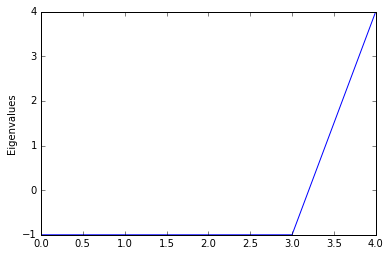

[(-1+0j), (-1+0j), (-1+0j), (-0.99999999999999933+0j), (4+0j)]


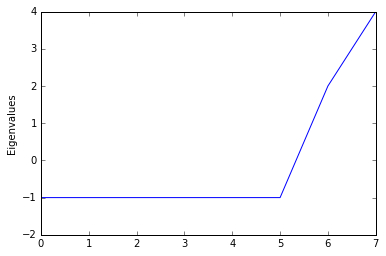

[(-1.0000000000000002+0j), (-1+0j), (-1+0j), (-1+0j), (-0.99999999999999978+0j), (-0.99999999999999933+0j), (1.9999999999999996+0j), (4+0j)]


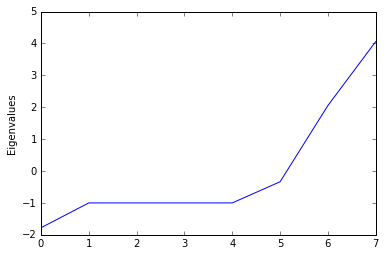

[(-1.7798711444464552+0j), (-1.0000000000000007+0j), (-1.0000000000000004+0j), (-0.99999999999999989+0j), (-0.99999999999999922+0j), (-0.33658584238146594+0j), (2.0549225470503445+0j), (4.0615344397775814+0j)]


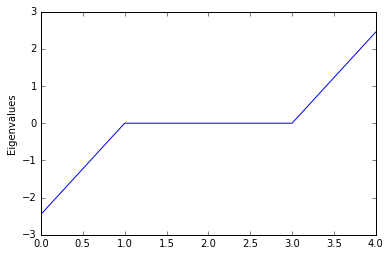

[(-2.4494897427831801+0j), 0j, 0j, (2.089257586379567e-16+0j), (2.4494897427831792+0j)]


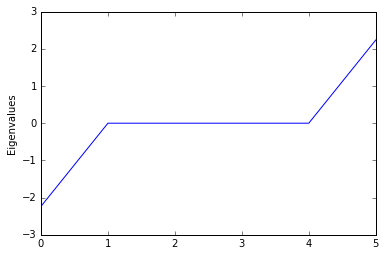

[(-2.2360679774997902+0j), 0j, 0j, 0j, 0j, (2.2360679774997894+0j)]


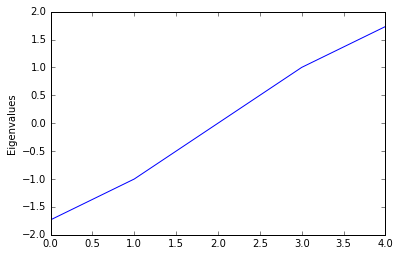

[(-1.7320508075688763+0j), (-0.99999999999999922+0j), (-3.2982420948648636e-17+0j), (1+0j), (1.7320508075688805+0j)]


In [183]:
def eigenvalues(G):
    return nx.adjacency_spectrum(G)

def plot_eign(G):
    plt.plot(sorted(eigenvalues(G)))
    plt.ylabel('Eigenvalues')
    plt.show()

for G in [g1, g2, g3, g4, g5, g6]:
    plot_eign(G)
    print sorted(eigenvalues(G))


Answer the following questions:
1. What can you say about the eigenvalues of the complete graph (K5): the number of unique eigenvalues, the largest and the smallest eigenvalues, the multiplicity (how many times the same eigenvalue appears) of each eigenvalue?
2. What is the graph spectrum of the bi-partite graph, B2.3? If n1 = n and n2 = m (a general complete bi-partite graph), then what can you say about its graph spectrum? [Hint: check sqrt(n * m)] If \lambda is the eigenvalue of the bi-partite graph, will minus \lambda be also the eigenvalue?
3. What is the largest eigenvalue of the star graph S5? If S5 were generalized to an N-vertex star, what could you say about the value of its largest eigenvalue?
4. What is the largest eigenvalue of the path graph P5? As the length of the path increases, what can you say about the changes in the largest eigenvalue?
5. How does the largest eigenvalue of the path P5 (or its more generalization to an arbitrary length) compare with the largest eigenvalues of the star graph or the complete graph? If you are asked to sort the largest eigenvalue of the path, the star, and the clique) in the increasing order, what kind of relationship would you assign (E.g., $\lambda_{path} \lt or \gt \lambda_{star}$)?


**1. What can you say about the eigenvalues of the complete graph (K5): the number of unique eigenvalues, the largest and the smallest eigenvalues, the multiplicity (how many times the same eigenvalue appears) of each eigenvalue?**

$K_{5}$ has $5$ eigenvalues with $\lambda_{1} = 4$ with multiplicity of $1$ while $\forall_{i}, i=[2, n], \lambda_{i} = -1$ with multiplicity of $4$. This fits the expected form of eigenvalues of an $n$-clique complete graph where $\lambda_{1} = n-1, \lambda_{2} = \lambda_{3} = \cdots = \lambda_{n} = -1$ implying $K_{5}$ is in fact a $5$-clique complete graph.

**2. What is the graph spectrum of the bi-partite graph, B2.3? If n1 = n and n2 = m (a general complete bi-partite graph), then what can you say about its graph spectrum? [Hint: check $\sqrt{nm}$] If $\lambda$ is the eigenvalue of the bi-partite graph, will $-\lambda$ be also the eigenvalue?**

$B_{2,3}$ has a spectrum of approximately $\{-2.45, 0, 0, 0, 2.45\}$. $\lambda_{1} = \sqrt{mn} \approx 2.45$ while $\lambda_{m+n} = -\sqrt{mn} \approx -2.45$ and $\lambda_{i} = 0$ otherwise. Since $B_{m,n}$ is a bipartite graph, the eigenvalues for $B_{m,n}$ fit the form of general bipartite graphs wherein 

$$
\begin{align}
    \lambda_{1} = & \sqrt{mn} \\
    \lambda_{m+n} = & -\sqrt{mn} \\
    \lambda_{i} = & \; 0, \forall i \in [2, m+n-1] 
\end{align}
$$

Meaning, yes, $\lambda$ and $-\lambda$ are both eigenvalues of $B_{2,3}$.

**3. What is the largest eigenvalue of the star graph S5? If S5 were generalized to an N-vertex star, what could you say about the value of its largest eigenvalue?**

The largest eigenvalue for star graph $S5$ is approximately $2.24$, equivalent to $\sqrt{5}$. This equivalency matches the expected value of $\lambda_{1}$ for a star matrix where $\lambda_{1} = \sqrt{n-1}$ where $n = 6$ in $S_{5}$'s case.

Interestingly enough, for a complete bipartite graph, $B_{m,n}$ when either $m = 1$ or $n = 1, B_{m,n}$ becomes a star graph, meaning the properties of the eigenvalues of a star graph are at least a subset of the properties of a complete bipartite graph.

**4. What is the largest eigenvalue of the path graph P5? As the length of the path increases, what can you say about the changes in the largest eigenvalue?**

The largest eigenvalue of $P_5$ is approximately $1.73$. For variable path lengths,

$$
\lim_{n \to \infty} P_{n}: \; \lambda_{1} = 2
$$

**5. How does the largest eigenvalue of the path P5 (or its more generalization to an arbitrary length) compare with the largest eigenvalues of the star graph or the complete graph? If you are asked to sort the largest eigenvalue of the path, the star, and the clique) in the increasing order, what kind of relationship would you assign (E.g., $\lambda_{path} \lt or \gt \lambda_{star}$)?**

For any $P_{n}$ path graph, $\lambda_{i}$ has a constant upper bound of 2, however, for any $S_{n}$ and $K_{n}$, $\lambda_{1}$ has variable upper bounds. Similar to Big-O analysis, the $\lambda_{1}$ for the three graph types can be sorted when $n$ is sufficiently large. 

$$
\begin{align}
    K_{n}:\; & \lambda_{1} = n - 1 \\
    P_{n}:\; & \lambda_{1} = 2 \mbox{ for sufficiently large } n \\
    S_{n}:\; & \lambda_{1} = \sqrt{n - 1} \\
\end{align}
$$


$$
2 \lt \sqrt{n - 1} \lt n - 1  \Rightarrow \lambda_{path} \lt \lambda_{star} \lt \lambda_{complete} \mbox{ for sufficiently large } n
$$


### Exercise 5
Generating the graph spectrum, or the multiset of the eigenvalues of the graph Laplacian. Write a script that calculates the eigenvalues of the graph Laplacian for each of the graphs in Exercise 1. Plot the eigenvalues in the increasing order of their values. 

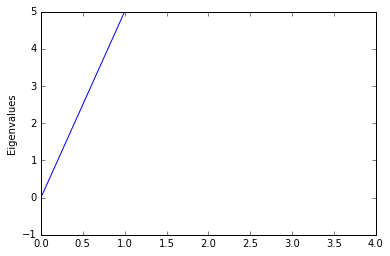

[-6.6613381477509392e-16, 4.9999999999999956, 5.0, 5.0, 5.0]


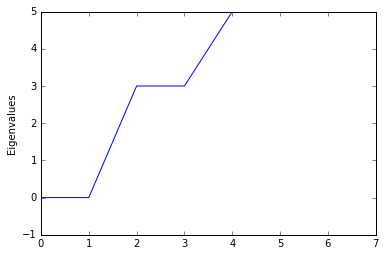

[-6.6613381477509392e-16, -1.1102230246251565e-16, 3.0, 3.0, 4.9999999999999956, 5.0, 5.0, 5.0]


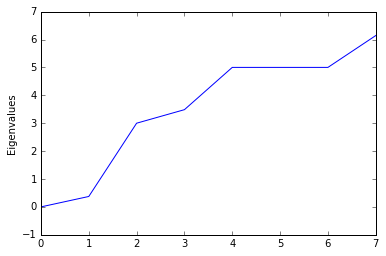

[-4.3715031594615539e-16, 0.37380193147270591, 2.9999999999999991, 3.484861952871928, 4.9999999999999964, 4.9999999999999991, 4.9999999999999991, 6.1413361156553643]


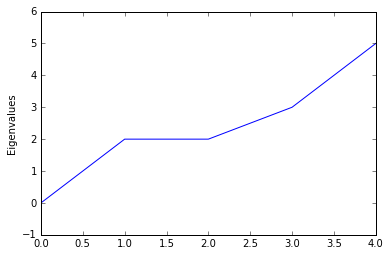

[-8.3266726846886741e-16, 1.9999999999999987, 1.9999999999999998, 2.9999999999999996, 5.0000000000000009]


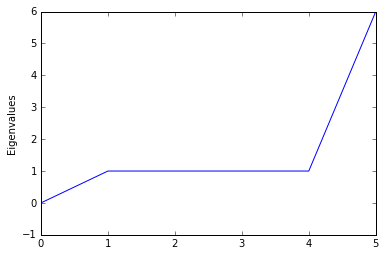

[-5.6898930012039273e-16, 1.0, 1.0, 1.0, 1.0, 6.0]


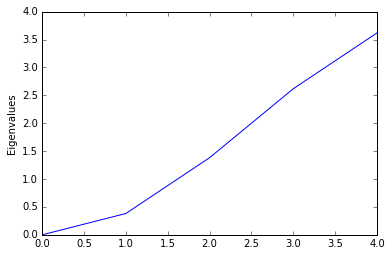

[4.9969247923019599e-17, 0.38196601125010521, 1.3819660112501049, 2.6180339887498953, 3.6180339887498945]


In [184]:
def laplacian_eigenvalues(G):
    return nx.laplacian_spectrum(G)

def plot_la_eign(G):
    plt.plot(sorted(laplacian_eigenvalues(G)))
    plt.ylabel('Eigenvalues')
    plt.show()

for G in [g1, g2, g3, g4, g5, g6]:
    plot_la_eign(G)
    print sorted(laplacian_eigenvalues(G))


Answer the following questions:
1. What can you say about the largest and the smallest eigenvalues?
2. What is the multiplicity (how many times the same eigenvalue appears) of the zero eigenvalue for each of the cases?
3. If K53 graph would be generalized to include c>2 components, what can you say about the multiplicity of the zero eigenvalues?
4. If graph G is connected (i.e., the number of disconnected components is one), what can you say about the multiplicity of the zero eigenvalue?
5. For the bi-partite graph, what is the value of the second smallest eigenvalue?
6. Is the vector, whose components consist of 1's only, the eigenvector of the Laplacian? If it is, then what is its corresponding eigenvalue?
7. Suppose the graph Laplacian matrix has the zero eigenvalue of multiplicity k. Can you say anything about the structure of such a graph?


**1. What can you say about the largest and the smallest eigenvalues?**

$$
\begin{align}
    L(K_{5}),\; \lambda_{1} &    = 5 \\
    L(K_{5.3}),\; \lambda_{1} &  = 5 \\
    L(K_{5.3e}),\; \lambda_{1} & \approx 6.14 \\
    L(B_{2.3}),\; \lambda_{1} &  = 5 \\
    L(S_{5}),\; \lambda_{1} &    = 6 \\
    L(P_{5}),\; \lambda_{1} &    \approx 3.62
\end{align}
$$

For all the above graphs, $L(G), \lambda_{n} = 0$. A property of graphs is any graph, $G$, has $k$ connected components if and only if the graph laplacian matrix for $G$, or $L(G)$ has $\lambda = 0$ with multiplicity $k$. Any graph is guaranteed to have at least one connected component. For example, the simplest case of a graph with one node; this graph will have a connected component of 1 node. As such, all graphs should have $\lambda_{n} = 0$.

**2. What is the multiplicity (how many times the same eigenvalue appears) of the zero eigenvalue for each of the cases?**

$$
\begin{align}
    L(K_{5}),\; multiplicity(\lambda_{i} = 0) &    = 1 \\
    L(K_{5.3}),\; multiplicity(\lambda_{i} = 0) &  = 2 \\
    L(K_{5.3e}),\; multiplicity(\lambda_{i} = 0) & = 1 \\
    L(B_{2.3}),\; multiplicity(\lambda_{i} = 0) &  = 1 \\
    L(S_{5}),\; multiplicity(\lambda_{i} = 0) &    = 1 \\
    L(P_{5}),\; multiplicity(\lambda_{i} = 0) &    = 1
\end{align}
$$

**3. If K53 graph would be generalized to include c>2 components, what can you say about the multiplicity of the zero eigenvalues?**

Due to the aforementioned property in 5.1, if the individual components are connected internally but not connected externally, then $multiplicity(K) = c$. 

**4. If graph G is connected (i.e., the number of disconnected components is one), what can you say about the multiplicity of the zero eigenvalue?**

$L(G), \; multiplicity(\lambda_{i} = 0) = 1$

**5. For the bi-partite graph, what is the value of the second smallest eigenvalue?**

For any bipartite connected graph, $L(G), \lambda_{n-1} = 0$.

**6. Is the vector, whose components consist of 1's only, the eigenvector of the Laplacian? If it is, then what is its corresponding eigenvalue?**

Yes, but only when $\lambda_{i} = 0$. 

**7. Suppose the graph Laplacian matrix has the zero eigenvalue of multiplicity k. Can you say anything about the structure of such a graph?**

The graph in question will have $K$ connected components. 